In [552]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas.api.types import is_numeric_dtype
import pickle

In [484]:
df = pd.read_csv("subscription_upgrade.csv")

In [485]:
df.head()

,id,age,country,device_type,daily_usage_minutes,ads_clicked,watch_time,free_features_used,days_since_signup,last_payment_amount,is_active,support_tickets,upgrade
0,1.0,50.0,BD,Tablet,-10.0,5.0,7.743246,1.0,60.0,NaN,1.0,NaN,1.0
1,2.0,35.0,NaN,NaN,5.0,20.0,1.697019,8.0,300.0,50.0,NaN,10.0,1.0
2,3.0,60.0,US,NaN,60.0,10.0,2.365983,2.0,60.0,100.0,NaN,NaN,1.0
3,NaN,40.0,PK,NaN,20.0,2.0,9.538726,1.0,1.0,0.0,NaN,NaN,0.0
4,5.0,50.0,US,NaN,30.0,10.0,2.167170,8.0,300.0,5.0,NaN,10.0,0.0


In [486]:
df.shape

(1040, 13)

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   988 non-null    float64
 1   age                  882 non-null    float64
 2   country              721 non-null    object 
 3   device_type          781 non-null    object 
 4   daily_usage_minutes  872 non-null    float64
 5   ads_clicked          840 non-null    float64
 6   watch_time           988 non-null    float64
 7   free_features_used   850 non-null    float64
 8   days_since_signup    876 non-null    float64
 9   last_payment_amount  844 non-null    float64
 10  is_active            672 non-null    float64
 11  support_tickets      843 non-null    float64
 12  upgrade              988 non-null    float64
dtypes: float64(11), object(2)
memory usage: 105.8+ KB


In [488]:
df.describe()

,id,age,daily_usage_minutes,ads_clicked,watch_time,free_features_used,days_since_signup,last_payment_amount,is_active,support_tickets,upgrade
count,988.000000,882.000000,872.000000,840.000000,988.000000,850.000000,876.000000,844.000000,672.000000,843.000000,988.000000
mean,500.662955,40.833333,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393,3.525504,0.502024
std,287.458353,15.839809,64.116577,7.097420,2.731126,3.273742,98.464398,35.300012,0.500193,3.692806,0.500249
min,1.000000,18.000000,-10.000000,0.000000,0.500292,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,253.750000,30.000000,5.000000,1.000000,2.697404,2.000000,5.000000,5.000000,0.000000,1.000000,0.000000
50%,500.500000,40.000000,20.000000,5.000000,5.093710,3.000000,30.000000,10.000000,1.000000,2.000000,1.000000
75%,745.000000,50.000000,60.000000,10.000000,7.423774,8.000000,120.000000,50.000000,1.000000,5.000000,1.000000
max,1000.000000,70.000000,200.000000,20.000000,9.995798,10.000000,300.000000,100.000000,1.000000,10.000000,1.000000


In [489]:
df.duplicated().sum()

np.int64(11)

In [490]:
df = df.drop_duplicates()

In [491]:
df.duplicated().sum()

np.int64(0)

In [492]:
df.isna().sum()

id                      52
age                    158
country                319
device_type            257
daily_usage_minutes    166
ads_clicked            198
watch_time              52
free_features_used     190
days_since_signup      163
last_payment_amount    196
is_active              364
support_tickets        195
upgrade                 52
dtype: int64

In [493]:
df = df.drop(['is_active'], axis=1)

In [494]:
df.columns

Index(['id', 'age', 'country', 'device_type', 'daily_usage_minutes',
       'ads_clicked', 'watch_time', 'free_features_used', 'days_since_signup',
       'last_payment_amount', 'support_tickets', 'upgrade'],
      dtype='object')

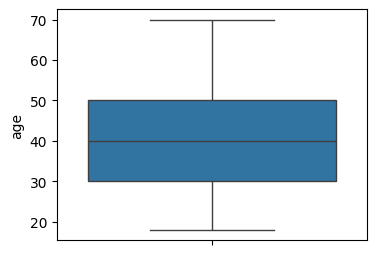

In [495]:
#visualisation
plt.figure(figsize=(4,3))
sns.boxplot(df['age'])
plt.show()

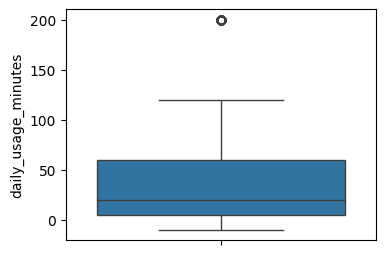

In [496]:
plt.figure(figsize=(4,3))
sns.boxplot(df['daily_usage_minutes'])
plt.show()


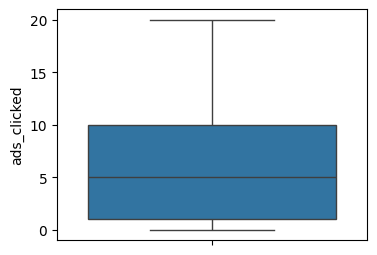

In [497]:
plt.figure(figsize=(4,3))
sns.boxplot(df['ads_clicked'])
plt.show()

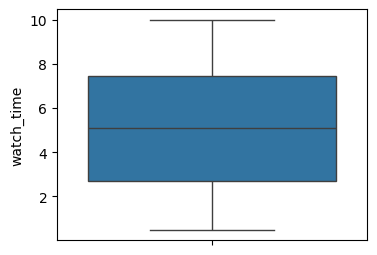

In [498]:
plt.figure(figsize=(4,3))
sns.boxplot(df['watch_time'])
plt.show()

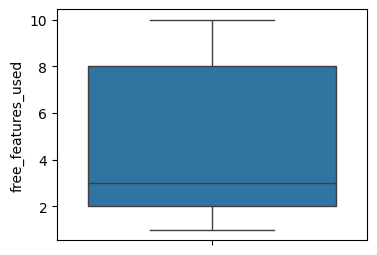

In [499]:
plt.figure(figsize=(4,3))
sns.boxplot(df['free_features_used'])
plt.show()

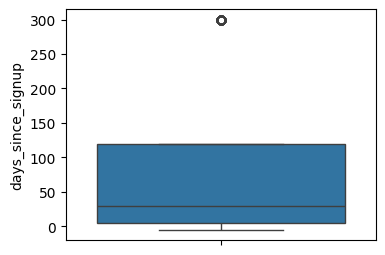

In [500]:
plt.figure(figsize=(4,3))
sns.boxplot(df['days_since_signup'])
plt.show()

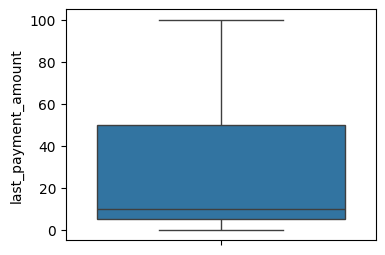

In [501]:
plt.figure(figsize=(4,3))
sns.boxplot(df['last_payment_amount'])
plt.show()

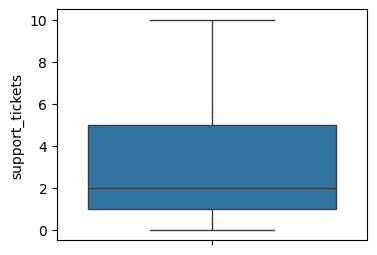

In [502]:
plt.figure(figsize=(4,3))
sns.boxplot(df['support_tickets'])
plt.show()

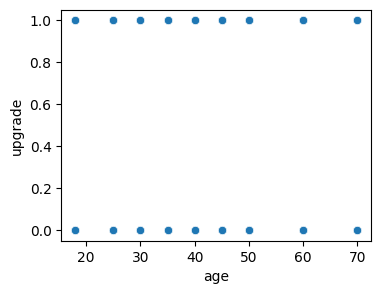

In [503]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='age', y='upgrade', data=df)
plt.show()

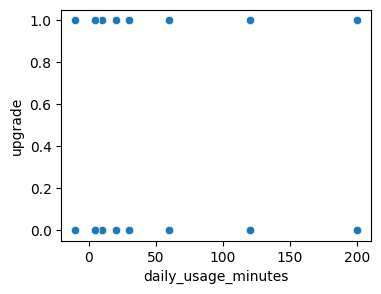

In [504]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='daily_usage_minutes', y='upgrade', data=df)
plt.show()

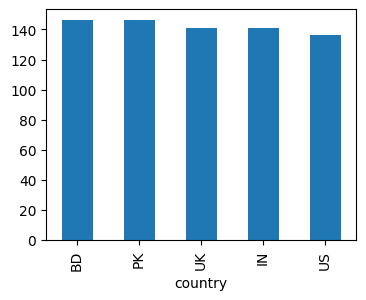

In [505]:
plt.figure(figsize=(4,3))
df['country'].value_counts().plot(kind='bar')
plt.show()

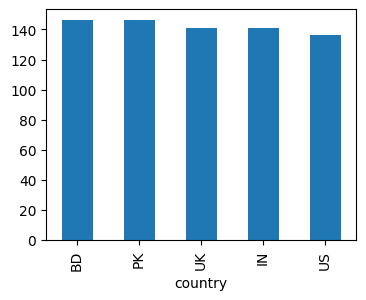

In [506]:
plt.figure(figsize=(4,3))
df['country'].value_counts().plot(kind='bar')
plt.show()

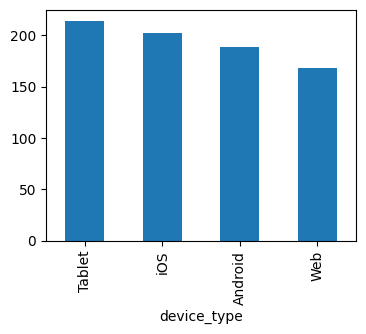

In [507]:
plt.figure(figsize=(4,3))
df['device_type'].value_counts().plot(kind='bar')
plt.show()

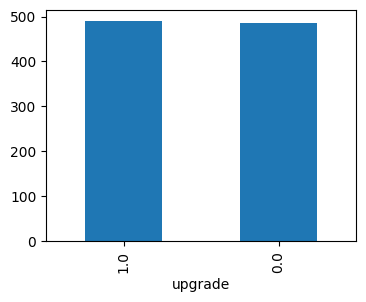

In [508]:
plt.figure(figsize=(4,3))
df['upgrade'].value_counts().plot(kind='bar')
plt.show()

In [509]:
#boxplot for removing outlier
def oulier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)

    iqr = q3 - q1

    lower_wh = q1 - 1.5 * iqr
    upper_wh = q3 + 1.5 * iqr

    return df[(df[col] >= lower_wh) & (df[col] <= upper_wh)]

In [510]:
num_col = ['daily_usage_minutes', 'days_since_signup']

In [511]:
df_clean = df.copy()

In [512]:
for col2 in num_col:
    df_clean = oulier(df_clean, col2)

In [513]:
df = df_clean.copy()

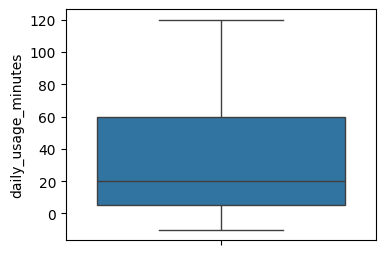

In [514]:
plt.figure(figsize=(4,3))
sns.boxplot(df['daily_usage_minutes'])
plt.show()

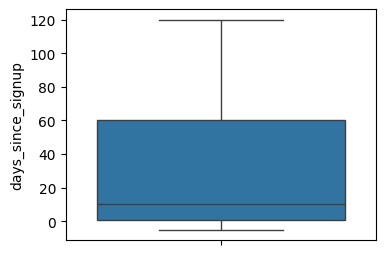

In [515]:
plt.figure(figsize=(4,3))
sns.boxplot(df['days_since_signup'])
plt.show()

In [516]:
df.shape

(567, 12)

In [517]:
df.isna().sum()

id                      30
age                     85
country                187
device_type            138
daily_usage_minutes      0
ads_clicked            108
watch_time              26
free_features_used     111
days_since_signup        0
last_payment_amount    100
support_tickets        113
upgrade                 28
dtype: int64

In [518]:
df = df.drop(['id'], axis=1)

In [519]:
df['age'] = df['age'].fillna(df['age'].mean())

In [520]:
df['country'] = df['country'].ffill()

In [521]:
df['device_type'] = df['device_type'].ffill()

In [522]:
df['ads_clicked'] = df['ads_clicked'].fillna(df['ads_clicked'].mean())

In [523]:
df['watch_time'] = df['watch_time'].fillna(df['watch_time'].mean())

In [524]:
df['free_features_used'] = df['free_features_used'].fillna(df['free_features_used'].mean())

In [525]:
df['last_payment_amount'] = df['last_payment_amount'].fillna(df['last_payment_amount'].mean())

In [526]:
df['support_tickets'] = df['support_tickets'].fillna(df['support_tickets'].mean())

In [527]:
df.isna().sum()

age                     0
country                 0
device_type             0
daily_usage_minutes     0
ads_clicked             0
watch_time              0
free_features_used      0
days_since_signup       0
last_payment_amount     0
support_tickets         0
upgrade                28
dtype: int64

In [528]:
df = df.dropna()

In [529]:
df.isna().sum()

age                    0
country                0
device_type            0
daily_usage_minutes    0
ads_clicked            0
watch_time             0
free_features_used     0
days_since_signup      0
last_payment_amount    0
support_tickets        0
upgrade                0
dtype: int64

In [530]:
df.shape

(539, 11)

In [531]:
df = df.reset_index(drop=True)

In [532]:
#encoding
le = LabelEncoder()
mms = MinMaxScaler()

In [533]:
df['country'] = le.fit_transform(df['country'])

In [534]:
df['device_type'] = le.fit_transform(df['device_type'])

In [535]:
df.columns

Index(['age', 'country', 'device_type', 'daily_usage_minutes', 'ads_clicked',
       'watch_time', 'free_features_used', 'days_since_signup',
       'last_payment_amount', 'support_tickets', 'upgrade'],
      dtype='object')

In [536]:
#Feature / Target split
x = df[['age', 'country', 'device_type', 'daily_usage_minutes', 'ads_clicked',
       'watch_time', 'free_features_used', 'days_since_signup',
       'last_payment_amount', 'support_tickets']]
y = df[['upgrade']]

In [537]:
#encoding 
#for col in x.columns:
#    if is_numeric_dtype(x[col]):
#        x[col] = mms.fit_transform(x[[col]])
#    else:
#        x[col] = le.fit_transform(x[col])

In [538]:
x.head()

,age,country,device_type,daily_usage_minutes,ads_clicked,watch_time,free_features_used,days_since_signup,last_payment_amount,support_tickets
0,50.0,0,1,-10.0,5.0,7.743246,1.0,60.0,31.948608,3.378855
1,60.0,4,1,60.0,10.0,2.365983,2.0,60.0,100.000000,3.378855
2,40.0,2,1,20.0,2.0,9.538726,1.0,1.0,0.000000,3.378855
3,50.0,4,3,20.0,0.0,5.151432,5.0,30.0,5.000000,5.000000
4,60.0,3,1,10.0,20.0,6.625080,2.0,-5.0,31.948608,3.378855


In [539]:
#train test split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [540]:
xtrain.head()

,age,country,device_type,daily_usage_minutes,ads_clicked,watch_time,free_features_used,days_since_signup,last_payment_amount,support_tickets
461,25.000000,2,0,60.0,1.0,3.899207,4.730263,10.0,0.0,3.378855
231,25.000000,3,1,5.0,1.0,7.510534,4.730263,5.0,0.0,3.378855
446,25.000000,0,0,60.0,2.0,8.092001,2.000000,10.0,100.0,0.000000
449,40.000000,0,1,60.0,1.0,5.994418,5.000000,1.0,5.0,3.378855
448,41.782158,0,0,30.0,5.0,7.443268,1.000000,120.0,100.0,1.000000


In [541]:
ytrain.head()

,upgrade
461,1.0
231,0.0
446,0.0
449,1.0
448,1.0


In [542]:
#model implentation
knn = KNeighborsClassifier()

In [543]:
model = knn.fit(xtrain, ytrain)

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [544]:
model.score(xtrain, ytrain)

0.6867749419953596

In [545]:
model.score(xtest, ytest)

0.5370370370370371

In [546]:
#prediction
pred_y = model.predict(xtest)

In [547]:
#confission metrics
cm = confusion_matrix(ytest, pred_y)
cm

array([[29, 23],
       [27, 29]])

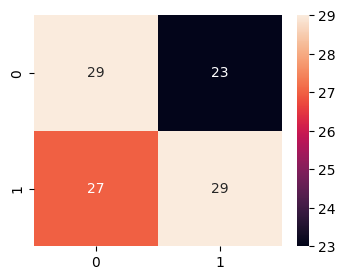

In [549]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True)
plt.show()

In [550]:
#classification report
cl = classification_report(ytest, pred_y)
print(cl)

              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54        52
         1.0       0.56      0.52      0.54        56

    accuracy                           0.54       108
   macro avg       0.54      0.54      0.54       108
weighted avg       0.54      0.54      0.54       108



In [551]:
#accuracy score
asc = accuracy_score(ytest, pred_y)
asc

0.5370370370370371

In [553]:
#saving model 
pickle.dump(model, open('subscription.pkl', 'wb'))